In [1]:
%matplotlib inline

# Simulate a Bouncing Ball

Drop a ball from different heights

In [2]:
# import the required modules
from fmpy import *
from fmpy.util import *
import matplotlib.pyplot as plt

In [3]:
# download the FMU to the current working directory
download_file('https://github.com/modelica/fmi-cross-check/raw/master/fmus/2.0/cs/win64/Test-FMUs/0.0.2/BouncingBall/BouncingBall.fmu')

In [4]:
# display information about the FMU
dump('BouncingBall.fmu')


Model Info

  FMI Version       2.0
  FMI Type          Model Exchange, Co-Simulation
  Model Name        BouncingBall
  Description       This model calculates the trajectory, over time, of a ball dropped from a height of 1 m.
  Platforms         c-code, darwin64, linux64, win64
  Continuous States 2
  Event Indicators  1
  Variables         5
  Generation Tool   None
  Generation Date   None

Default Experiment

  Stop Time         3
  Step Size         0.001

Variables (input, output)

Name                Causality              Start Value  Unit     Description
h                   output                           1  m        Position of the ball
v                   output                           0  m/s      Velocity of the ball


Simulate the FMU and plot the results

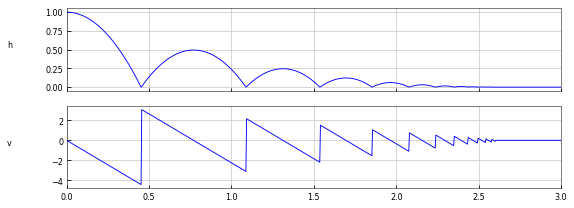

In [5]:
# simulate the default experiment
result = simulate_fmu('BouncingBall.fmu')

# plot the result
plot_result(result)

# save the result as a CSV
write_csv('BouncingBall_out.csv', result)

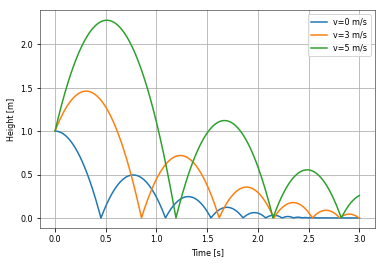

In [6]:
# create a new plot
fig, ax = plt.subplots()

# try three different intial velocities
for v in [0, 3, 5]:
    
    # simulate with a changed start value and record the height
    result = simulate_fmu('BouncingBall.fmu', start_values={'v': v}, output=['h'])
    
    # plot the height for this start value
    ax.plot(result['time'], result['h'], label="v=%g m/s" % v)

# show axis labels, legend and grid 
ax.set_xlabel("Time [s]")
ax.set_ylabel("Height [m]")
ax.legend()
ax.grid(True)
